In [ ]:
!pip install pyDOE2
!pip install GPy

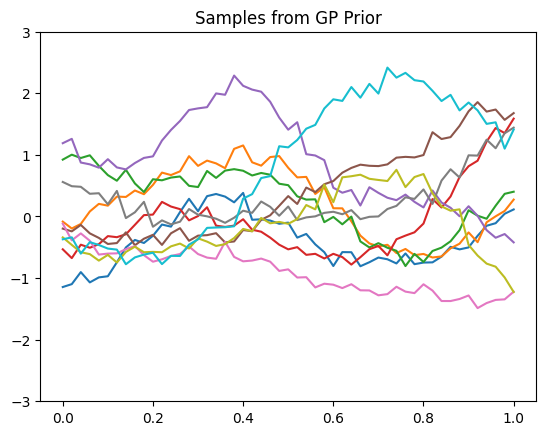

In [2]:
# Gaussian Process
import numpy as np
import matplotlib.pyplot as plt

n = 51
x = np.linspace(0, 1, n)
X1, X2 = np.meshgrid(x, x)
K = np.exp(-((X1 - X2) ** 2) / 0.1) + np.eye(n) * 0.01

np.random.seed(42)
for k in range(10):
    y = np.random.multivariate_normal(mean=np.zeros(n), cov=K)
    plt.plot(x, y)
plt.ylim(-3, 3)
plt.title("Samples from GP Prior")
plt.show()

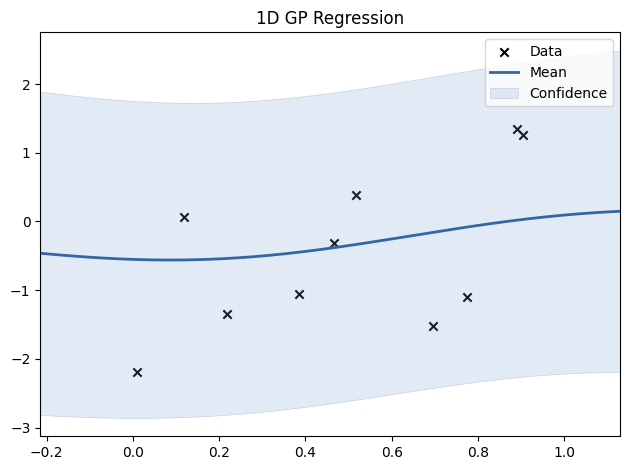

In [10]:
# Fit Gaussian Process
from pyDOE2 import lhs
import GPy

def simulator(x):
    return np.log(x + 0.1) + np.sin(5 * np.pi * x)

n = 10
x = lhs(1, samples=n)
y = simulator(x) + np.random.normal(0, 0.3, size=(n, 1))

kernel = GPy.kern.RBF(input_dim=1,variance=1)
model = GPy.models.GPRegression(x, y, kernel)
model.optimize()

model.plot()
plt.title("1D GP Regression")
plt.show()

# 予測
xnew = np.linspace(0, 1, 21).reshape(-1, 1)
y_pred, y_var = model.predict(xnew)

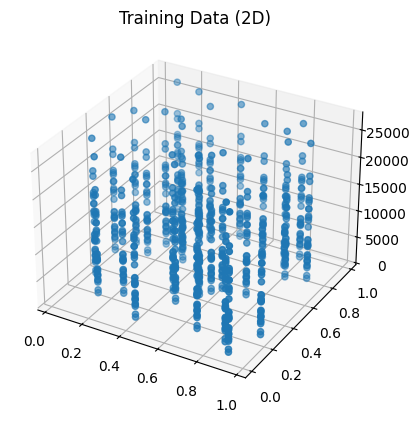

 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply
 /usr/local/lib/python3.11/dist-packages/GPy/plotting/matplot_dep/plot_definitions.py:323: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


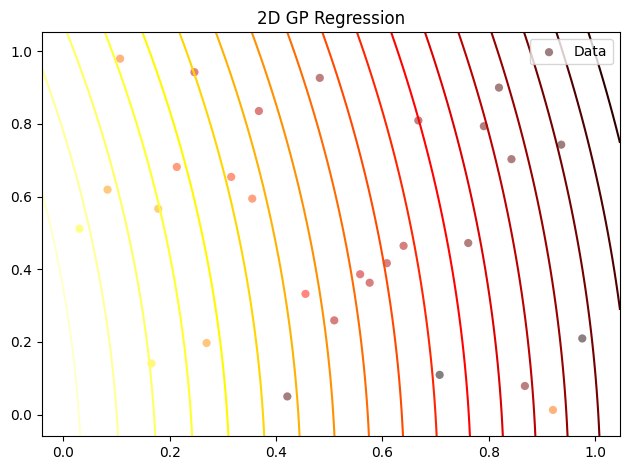

In [4]:
# Visualization of GP
from mpl_toolkits.mplot3d import Axes3D

def simulator2d(x):
    x1 = x[:, 0:1] * 1 - 2
    x2 = x[:, 1:2] * 1 - 2
    t1 = 1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 +
                                 6 * x1 * x2 + 3 * x2**2)
    t2 = 30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 -
                                      36 * x1 * x2 + 27 * x2**2)
    return t1 * t2

n = 30
x = lhs(2, samples=n)
y = simulator2d(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.title("Training Data (2D)")
plt.show()

kernel = GPy.kern.RBF(input_dim=2)
model2d = GPy.models.GPRegression(x, y, kernel)
model2d.optimize()
model2d.plot()
plt.title("2D GP Regression")
plt.show()

# 予測
xnew1 = np.linspace(0, 1, 21)
xnew = np.array(np.meshgrid(xnew1, xnew1)).T.reshape(-1, 2)
y_pred, y_var = model2d.predict(xnew)

Text(0.5, 1.0, 'Acquisition Functions')

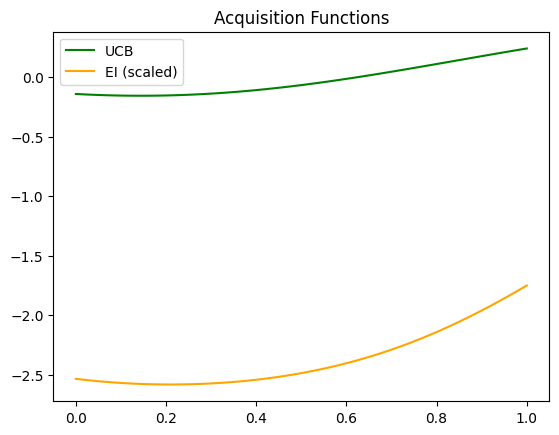

In [5]:
# Bayes optimization
from scipy.stats import norm

n = 8
x = lhs(1, samples=n)
y = simulator(x)

kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(x, y, kernel)
model.optimize()

# 予測とアクイジション関数
x_new = np.linspace(0, 1, 100).reshape(-1, 1)
mu, var = model.predict(x_new)
sigma = np.sqrt(var)
mu_sample_opt = y.max()

# Upper Confidence Bound (UCB)
ucb = mu + np.sqrt(np.log(n)/n) * sigma
plt.plot(x_new, ucb, label="UCB", color='green')

# Expected Improvement (EI)
Z = (mu - mu_sample_opt) / sigma
ei = (mu - mu_sample_opt) * norm.cdf(Z) + sigma * norm.pdf(Z)
plt.plot(x_new, ei * 20 - 3, label="EI (scaled)", color='orange')
plt.legend()
plt.title("Acquisition Functions")
#plt.show()